In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [3]:


# hyper prametrs
num_epochs = 5
batch_size = 64
learning_rate = 0.001
input_size = 784
hidden_size = 100
num_classes = 10

In [4]:

trainig_dataset = torchvision.datasets.MNIST(root='./data',
                                train=True,transform=transforms.ToTensor(),download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',
                                train=False,transform=transforms.ToTensor())

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.2MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 491kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.53MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 10.3MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [5]:
train_loader = torch.utils.data.DataLoader(dataset=trainig_dataset,batch_size=batch_size,shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False)

In [6]:
example = iter(train_loader)
samples, labels = next(example)  # Use next(example) instead of example.next()
print(samples.shape, labels.shape)

torch.Size([64, 1, 28, 28]) torch.Size([64])


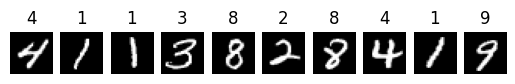

In [7]:

for i in range (10):
  plt.subplot(1,10,i+1)
  plt.imshow(samples[i][0],cmap='gray',)
  plt.title(labels[i].item())  # Display labels using title
  plt.axis('off')
plt.show()



In [8]:
#model
class NuralNet(nn.Module):
  def __init__(self,input_size,hidden_size,num_classes):
    super(NuralNet,self).__init__()
    self.l1 = nn.Linear(input_size,hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size,num_classes)

  def forward(self,x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out

In [9]:
model = NuralNet(input_size,hidden_size,num_classes).to(device)

In [10]:

#loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)


In [11]:
#training
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i,(images,labels) in enumerate(train_loader):
    images = images.reshape(-1,28*28).to(device)
    labels = labels.to(device)
    y_pred = model(images)
    loss = criterion(y_pred,labels)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
  print(f'epoch {epoch+1}/{num_epochs},step {i+1}/{n_total_steps},loss = {loss.item():.4f}')


epoch 1/5,step 938/938,loss = 0.2361
epoch 2/5,step 938/938,loss = 0.0813
epoch 3/5,step 938/938,loss = 0.1367
epoch 4/5,step 938/938,loss = 0.1116
epoch 5/5,step 938/938,loss = 0.1237


In [12]:
#evaluation

with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images,labels in train_loader:
    images = images.reshape(-1,28*28).to(device)
    labels = labels.to(device)
    y_pred = model(images)
    _,predictions = torch.max(y_pred,1)
    n_samples += labels.shape[0]
    n_correct += (predictions == labels).sum().item()

  acc = 100.0 * n_correct / n_samples
  print(f'accuracy = {acc}')

accuracy = 98.27333333333333


In [13]:
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images,labels in test_loader:
    images = images.reshape(-1,28*28).to(device)
    labels = labels.to(device)
    y_pred = model(images)
    _,predictions = torch.max(y_pred,1)
    n_samples += labels.shape[0]
    n_correct += (predictions == labels).sum().item()

  acc = 100.0 * n_correct / n_samples
  print(f'accuracy = {acc}')

accuracy = 97.1
